<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Diego1733/blob/main/Dic01-02/Dic01_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Una red neuronal para clasificación multiclase

Es un tipo de red neuronal utilizada para problemas en los que se deben clasificar muestras o datos en más de dos categorías distintas. Es decir, cuando se tiene un conjunto de datos con múltiples clases y se busca predecir a qué clase pertenece cada instancia.

Características clave de una red neuronal para clasificación multiclase:


* Capa de entrada: Suele representar las características o atributos de los datos. En el caso de imágenes, por ejemplo, podría ser una capa que aplane la imagen en un vector para ser procesado por la red neuronal.

* Capas ocultas: Las capas intermedias entre la entrada y la salida, donde se lleva a cabo la mayor parte del procesamiento. Estas capas aprenden representaciones más complejas y abstractas de los datos a medida que la información fluye a través de la red.

* Capa de salida: Es la capa final de la red y su estructura varía según el problema. En el caso de la clasificación multiclase, suele tener tantas neuronas como clases haya en el problema. Cada neurona en esta capa representa una clase y la red calcula la probabilidad de que la entrada pertenezca a cada clase.

* Función de activación en la capa de salida: Para problemas de clasificación multiclase, se usa comúnmente la función softmax en la capa de salida. Esto convierte las salidas de la red neuronal en una distribución de probabilidades sobre las diferentes clases.

* Función costo y métricas: Para entrenar la red, se utiliza una función costo adecuada para problemas de clasificación multiclase, como la entropía cruzada categórica (categorical cross-entropy) o la entropía cruzada escasa (sparse categorical cross-entropy). Las métricas, como la precisión (accuracy), se utilizan para evaluar el rendimiento del modelo.

### ¿Cómo funciona este modelo?

* Preprocesamiento de datos:
Se ajustan los valores de los píxeles para que estén en un rango entre 0 y 1. Esto se realiza dividiendo cada valor de píxel por 255, el valor máximo posible para un píxel en una imagen en escala de grises.

* Separación de conjuntos: Los datos se dividen en conjuntos de entrenamiento, validación y prueba. El conjunto de entrenamiento se utiliza para entrenar el modelo, el de validación se utiliza para ajustar los hiperparámetros del modelo y el de prueba para evaluar su rendimiento final.

* Configuración de la arquitectura: Se define la estructura de la red neuronal utilizando la biblioteca Keras. Se utiliza un modelo secuencial que consta de capas en secuencia una tras otra.

* Capa de entrada (Flatten): Esta capa transforma los datos de las imágenes 2D (28x28 píxeles) en un vector unidimensional para usar en la red neuronal.

* Capas densamente conectadas (Dense): Se agregan capas completamente conectadas con activaciones específicas. La primera capa oculta tiene 128 neuronas con activación ReLU y la capa de salida tiene 10 neuronas con activación Softmax, representando la probabilidad de cada clase (dígitos del 0 al 9).

* Entrenamiento del modelo: Se realiza el entrenamiento del modelo utilizando los datos de entrenamiento. Durante este proceso, el modelo ajusta sus pesos y aprende a realizar predicciones.



In [15]:
!pip install tensorflow

In [39]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('/content/drive/MyDrive/ML2023/train.csv')
print(df)

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [26]:
# Normalizar los valores de píxeles
X = df.drop('label', axis=1).values.astype('float32') / 255.0
y = df['label'].values
print(X)
print(X.shape, "\n\n")

print(y)
print(y.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(42000, 784) 


[1 0 1 ... 7 6 9]
(42000,)


In [35]:
# Dividir en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(26880, 784) (6720, 784) (8400, 784) (26880,) (6720,) (8400,)


In [46]:
# Convertir los datos para que tengan la forma adecuada para imágenes de 28x28 pixeles
X_train = X_train.reshape(-1, 28, 28)
X_val = X_val.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

print(X_train.shape, X_val.shape, X_test.shape)

(26880, 28, 28) (6720, 28, 28) (8400, 28, 28)


In [45]:
# La capa Flatten convierte las imágenes 2D (28x28 píxeles) en un vector unidimensional.
# Se añaden dos capas Dense (totalmente conectadas) con activaciones relu y softmax.

model = Sequential([
    Flatten(input_shape=(28, 28)),   # imágenes de 28x28 píxeles
    Dense(128, activation='relu'),   # 128 neuronas relu
    Dense(10, activation='softmax')  # 10 neuronas para clasificar dígitos del 0 al 9
])

# Se compila el modelo con el optimizador 'adam' y la función de pérdida sparse_categorical_crossentropy para clasificación multiclase.
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
840/840 [==============================] - 4s 4ms/step - loss: 0.3521 - accuracy: 0.9002 - val_loss: 0.2036 - val_accuracy: 0.9414
Epoch 2/10
840/840 [==============================] - 3s 4ms/step - loss: 0.1624 - accuracy: 0.9512 - val_loss: 0.1527 - val_accuracy: 0.9549
Epoch 3/10
840/840 [==============================] - 5s 6ms/step - loss: 0.1135 - accuracy: 0.9661 - val_loss: 0.1369 - val_accuracy: 0.9585
Epoch 4/10
840/840 [==============================] - 4s 5ms/step - loss: 0.0841 - accuracy: 0.9753 - val_loss: 0.1184 - val_accuracy: 0.9632
Epoch 5/10
840/840 [==============================] - 3s 4ms/step - loss: 0.0647 - accuracy: 0.9811 - val_loss: 0.1204 - val_accuracy: 0.9647
Epoch 6/10
840/840 [==============================] - 3s 4ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.1098 - val_accuracy: 0.9676
Epoch 7/10
840/840 [==============================] - 5s 6ms/step - loss: 0.0382 - accuracy: 0.9895 - val_loss: 0.1108 - val_accuracy: 0.9677
Epoch 

263/263 [==============================] - 1s 2ms/step


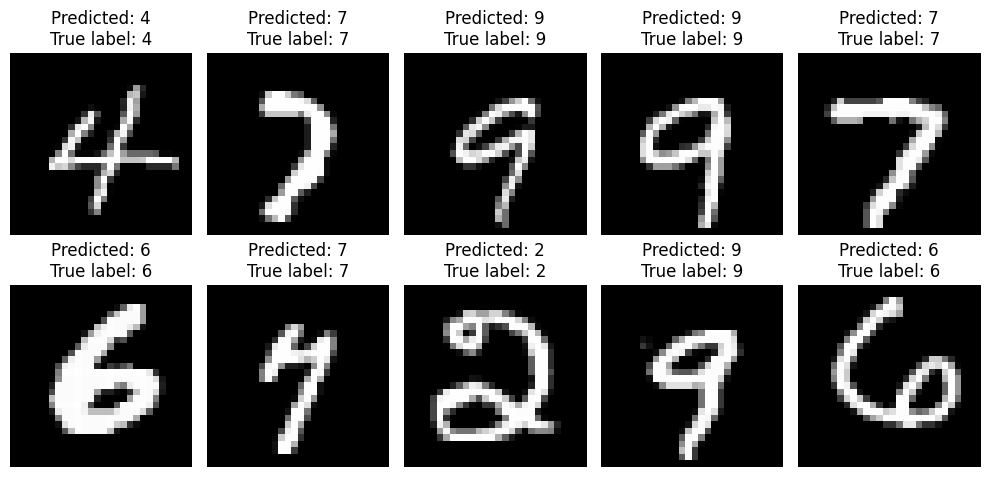

In [44]:
# Obtener predicciones del conjunto de prueba
predictions = model.predict(X_test)

random_indices = random.sample(range(len(X_test)), 10)

# Mostrar 10 imágenes aleatorias junto con sus predicciones
plt.figure(figsize=(10, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[idx])}\nTrue label: {y_test[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

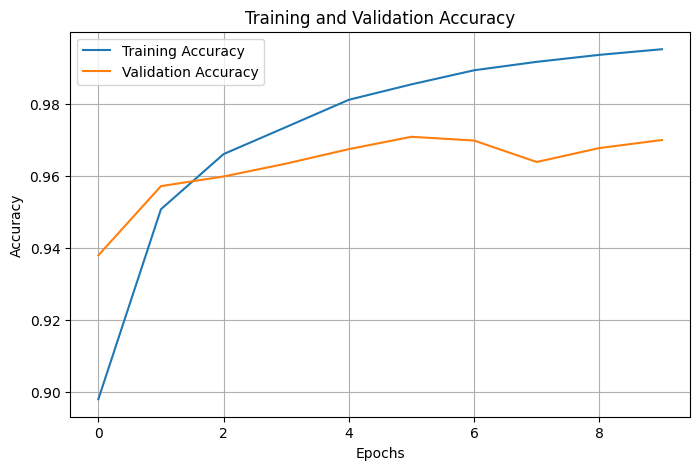

In [22]:
# Graficar la evolución del modelo durante el entrenamiento
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

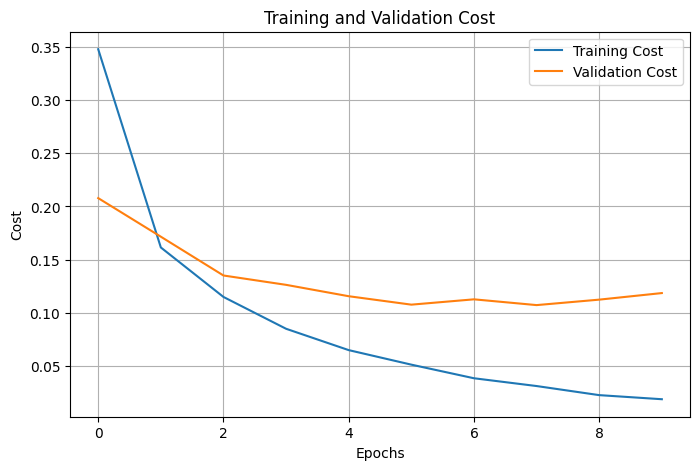

In [42]:
# Gráfico de la pérdida (costo) a lo largo de las épocas
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Cost')
plt.plot(history.history['val_loss'], label='Validation Cost')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training and Validation Cost')
plt.legend()
plt.grid(True)
plt.show()